In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pylab as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale
from sklearn.linear_model import LinearRegression


In [4]:
read_file = pd.read_excel('./resource/teamproject_data1.xlsx', sheetname=0)

df_scale = scale(read_file)
df_data = pd.DataFrame(data = df_scale, columns = read_file.columns)
#print(df_data['accident'], df_scale[:,-1:])


In [114]:
# 상관관계 구하기
df_data.corr()

,taxi_driver,gasolin/day,Diesel/day,LPG/day,temp,rainfall/day,humidity,dew_point,wind_spd_max,weather(5),...,population(0~19).1,population(20~59).1,population(60~).1,total_vehicle,sedan.1,van.1,truck.1,special_car.1,bicycle.1,accident
taxi_driver,1.000000,0.323357,-0.659857,0.590678,-0.155122,0.095722,-0.108977,-0.152026,0.007892,0.167902,...,0.916493,0.944978,-0.907115,-0.837558,-0.914518,0.906208,0.813827,-0.955113,-0.862875,0.012534
gasolin/day,0.323357,1.000000,-0.071737,0.154570,0.197173,0.328199,0.299480,0.234382,0.124618,0.062679,...,0.342043,0.345952,-0.323822,-0.281720,-0.320653,0.330688,0.295001,-0.357913,-0.343104,0.290513
Diesel/day,-0.659857,-0.071737,1.000000,-0.136879,0.023993,-0.215128,0.055409,0.029079,-0.116699,-0.065569,...,-0.492043,-0.544990,0.489844,0.587825,0.522581,-0.457639,-0.324027,0.605887,0.475185,0.094293
LPG/day,0.590678,0.154570,-0.136879,1.000000,-0.156109,0.011035,-0.105125,-0.151328,-0.140659,0.204047,...,0.795047,0.733742,-0.809284,-0.527963,-0.741857,0.810742,0.866911,-0.706497,-0.705592,-0.039771
temp,-0.155122,0.197173,0.023993,-0.156109,1.000000,0.538417,0.674473,0.987867,0.086128,-0.703605,...,-0.054074,-0.052179,0.059549,0.103507,0.077093,-0.044468,-0.040422,0.057062,0.094647,0.578441
rainfall/day,0.095722,0.328199,-0.215128,0.011035,0.538417,1.000000,0.705628,0.600958,0.312574,-0.141777,...,0.121193,0.132856,-0.114478,-0.044678,-0.082308,0.115284,0.097027,-0.139454,-0.104712,0.230191
humidity,-0.108977,0.299480,0.055409,-0.105125,0.674473,0.705628,1.000000,0.779747,0.073092,-0.286954,...,-0.045633,-0.041844,0.059940,0.098062,0.071555,-0.036136,-0.039120,0.041687,0.113420,0.422095
dew_point,-0.152026,0.234382,0.029079,-0.151328,0.987867,0.600958,0.779747,1.000000,0.084580,-0.651627,...,-0.053584,-0.051288,0.060856,0.104466,0.077746,-0.043668,-0.041855,0.054506,0.103221,0.577206
wind_spd_max,0.007892,0.124618,-0.116699,-0.140659,0.086128,0.312574,0.073092,0.084580,1.000000,0.030171,...,-0.058848,-0.030359,0.059541,0.024658,0.059802,-0.068937,-0.098880,0.020190,0.044047,0.053256
weather(5),0.167902,0.062679,-0.065569,0.204047,-0.703605,-0.141777,-0.286954,-0.651627,0.030171,1.000000,...,0.080934,0.073917,-0.086847,-0.117837,-0.097070,0.070353,0.059895,-0.095435,-0.090295,-0.500854


In [37]:
df_cons = sm.add_constant(df_data.ix[:,:-1])
df_y    = pd.DataFrame(data = df_scale[:,-1:], columns = ['accident/day'])


In [6]:
model = sm.OLS(df_y, df_cons)
result_model = model.fit()
print(result_model.summary())

                            OLS Regression Results                            
Dep. Variable:           accident/day   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     58.51
Date:                Wed, 26 Oct 2016   Prob (F-statistic):           9.08e-13
Time:                        10:43:15   Log-Likelihood:                 19.432
No. Observations:                  36   AIC:                            -4.863
Df Residuals:                      19   BIC:                             22.06
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const             4.529e-14      0.032  

In [72]:
influence = result_model.get_influence()
hat = influence.hat_matrix_diag
plt.stem(hat)
plt.axis([ -2, len(df_y)+2, 0, 2 ])
plt.show()
print("hat.sum() =", hat.sum())

hat.sum() = 24.0


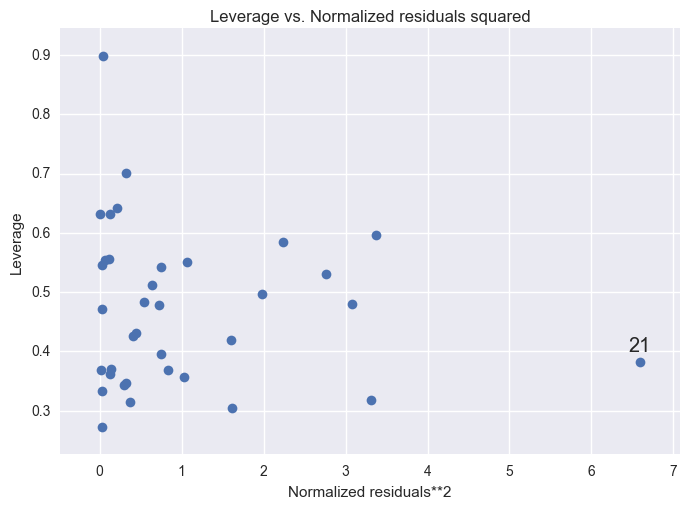

In [7]:
#레버리지
sm.graphics.plot_leverage_resid2(result_model)
plt.show()

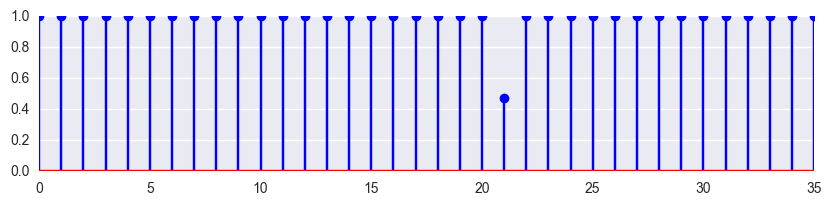

In [8]:
#아웃라이어
plt.figure(figsize=(10, 2))
plt.stem(result_model.outlier_test().ix[:, -1])
plt.show()

In [56]:

#df_PCA = PCA(5).fit_transform(df_data.ix[:, :-1])


pca = PCA(n_components=5)
pca_data = pca.fit(df_data.ix[:, :-1])

pca_ratio_idx = pca_data.explained_variance_ratio_

total_ratio = 0
for i in pca_ratio_idx :
    total_ratio += i

print(total_ratio)

#transform
pca_data_t= pca_data.transform(df_data.ix[:, :-1])
print(pca_data_t)

0.940255487698
[[-5.2660799   1.53553633 -1.03853819  0.52396045  0.00858347]
 [-5.31200794  1.78039297 -1.2304737  -0.18610865 -0.65316663]
 [-4.84081477  1.56449876  1.35031622 -0.8709455  -0.13596395]
 [-4.53372156  0.49330044  0.57774944 -1.8529641  -0.1466755 ]
 [-3.73087924 -0.90873902  1.47252706 -0.69003373 -0.11578085]
 [-2.90811027 -1.36002084  1.7079292   1.71486491 -0.29860566]
 [-2.88118297 -5.49511996 -3.19005565 -2.41198484  0.24707412]
 [-2.4891793  -2.57533011  0.69036973  0.09834097 -0.25610017]
 [-2.19390436 -1.65297381  0.20995396  1.72794477 -0.13058812]
 [-1.91100087 -0.4406654   1.56053635  0.99517849  1.1437318 ]
 [-2.05654501  0.22721052 -0.2079127   0.59776418  1.71973448]
 [-2.44646255  1.16724354 -0.79632903  1.43436011  0.61753646]
 [-2.53250145  2.63349049 -1.0010262   1.00291685 -1.03688613]
 [-2.23865237  2.30571007 -1.46151782  0.27395611 -1.31562708]
 [-1.30803129  0.76330907  0.17839219 -0.5719849   0.23746157]
 [-0.80533732  0.13684869  0.35361462 -0

In [53]:
#df_data1 = pd.DataFrame(data = df_PCA, columns = read_file.columns[0:14])
df_data1 = pd.DataFrame(data = pca_data_t, columns = ['x1', 'x2', 'x3', 'x4', 'x5'])
df_cons = sm.add_constant(df_data1) # acciendt 값은 포함안됨
df_y    = pd.DataFrame(data = df_scale[:,-1:], columns = ['accident/day'])    


In [54]:
#model_diabetes2 = sm.OLS(df_diabetes.ix[:, -1], df_diabetes.ix[:, :-1])

model = sm.OLS(df_y, df_cons)
result_model = model.fit()
print(result_model.summary())

                            OLS Regression Results                            
Dep. Variable:           accident/day   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     15.40
Date:                Wed, 26 Oct 2016   Prob (F-statistic):           1.62e-07
Time:                        11:05:52   Log-Likelihood:                -28.194
No. Observations:                  36   AIC:                             68.39
Df Residuals:                      30   BIC:                             77.89
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       6.024e-15      0.097   6.23e-14      1.0